### Students adaptability to online learning

##### Import Libraries

In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import warnings

from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from skopt import BayesSearchCV

warnings.filterwarnings('ignore')

##### Load dataset

In [2]:
df = pd.read_csv('students_adaptability_data.csv')
df.head(5)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


##### EDA

In [3]:
#  Length of the dataframe
len(df)

1205

In [4]:
# Identify the datatype used in the data
df.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

In [5]:
# The categories of data in the dataset
for column in df.columns:
    print(f'{column}: ', df[column].unique())

Gender:  ['Boy' 'Girl']
Age:  ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
Education Level:  ['University' 'College' 'School']
Institution Type:  ['Non Government' 'Government']
IT Student:  ['No' 'Yes']
Location:  ['Yes' 'No']
Load-shedding:  ['Low' 'High']
Financial Condition:  ['Mid' 'Poor' 'Rich']
Internet Type:  ['Wifi' 'Mobile Data']
Network Type:  ['4G' '3G' '2G']
Class Duration:  ['3-6' '1-3' '0']
Self Lms:  ['No' 'Yes']
Device:  ['Tab' 'Mobile' 'Computer']
Adaptivity Level:  ['Moderate' 'Low' 'High']


##### Data Visualization

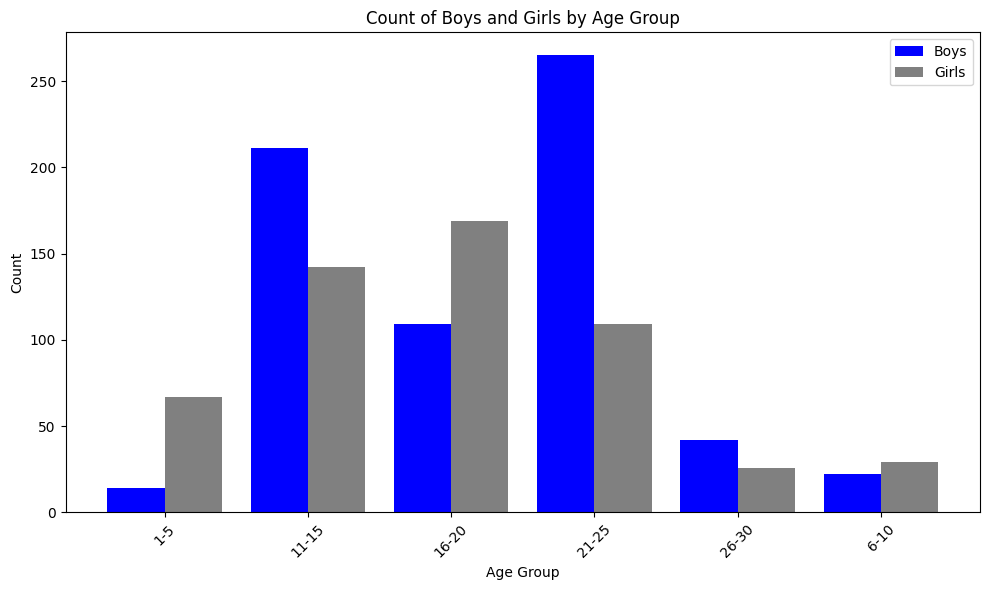

In [6]:
# Plot the distribution of gender in every age group:

# Count occurrences of Boys and Girls in each Age Group
grouped_data = df.groupby(['Age', 'Gender']).size().unstack(fill_value=0)

# Extract age groups and counts
age_groups = grouped_data.index.tolist()
boys_count = grouped_data.get('Boy', pd.Series(0, index=age_groups))
girls_count = grouped_data.get('Girl', pd.Series(0, index=age_groups))

# Set bar width
bar_width = 0.4
x = np.arange(len(age_groups))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - bar_width/2, boys_count, bar_width, label='Boys', color='blue')
ax.bar(x + bar_width/2, girls_count, bar_width, label='Girls', color='gray')

# Labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Count of Boys and Girls by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(age_groups, rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

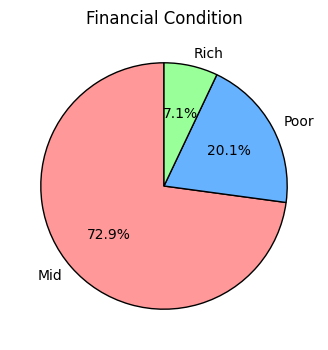

In [7]:
# Grouping data by Financial Condition:
no_of_occurrences = df['Financial Condition'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    no_of_occurrences, 
    labels = no_of_occurrences.index, 
    autopct = '%1.1f%%', 
    startangle =90, 
    colors = ['#FF9999', '#66B2FF', '#99FF99'], 
    wedgeprops = {'edgecolor': 'black'}
)

# Add a title
plt.title('Financial Condition')
plt.show()

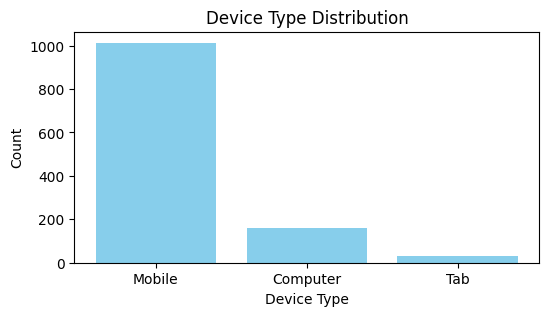

In [8]:
# Visualize the type of Devices the students have access to: 

# Count the occurrences of each device type
internet_type = df['Device'].value_counts()

# Create the histogram
plt.figure(figsize=(6, 3))
plt.bar(internet_type.index, internet_type.values, color='skyblue')
plt.title("Device Type Distribution")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.show()

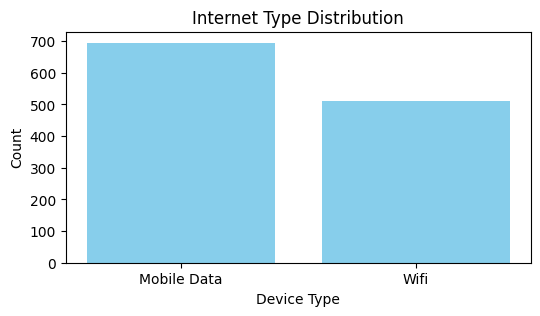

In [9]:
# Visualize the type of Internet Connection the students have access to: 

# Count the occurrences of each device type
device_counts = df['Internet Type'].value_counts()

# Create the histogram
plt.figure(figsize=(6, 3))
plt.bar(device_counts.index, device_counts.values, color='skyblue')
plt.title("Internet Type Distribution")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.show()

##### Data processing

In [10]:
# Types of data present in the dataframe
df = pd.read_csv('students_adaptability_data.csv')
df.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

In [11]:
# Divide the data into features and target
features = df.drop(columns= 'Adaptivity Level', axis=1)
target = df[['Adaptivity Level']]

In [12]:
# Show features
features.head(3)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile


In [13]:
# Show target
target.tail(3)

,Adaptivity Level
1202,Moderate
1203,Low
1204,Moderate


In [14]:
# One-hot encode the feature and Target data frames

# create a One-hot encoder
one_hot_1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_2 = LabelEncoder()

# Encode the data frames
encoded_features = one_hot_1.fit_transform(features)
encoded_target = one_hot_2.fit_transform(target)

# Show encoded Features and Target
print('Encoded Features', encoded_features[:5])
print('\nEncoded Target', encoded_target[:5])

Encoded Features [[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.
  0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
  0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0.
  0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
  0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]]

Encoded Target [2 2 2 2 1]


In [15]:
# View classes
print('Encoded Features:\n', one_hot_1.categories_)
print('\nEncoded Target:\n', one_hot_2.classes_)

Encoded Features:
 [array(['Boy', 'Girl'], dtype=object), array(['1-5', '11-15', '16-20', '21-25', '26-30', '6-10'], dtype=object), array(['College', 'School', 'University'], dtype=object), array(['Government', 'Non Government'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['High', 'Low'], dtype=object), array(['Mid', 'Poor', 'Rich'], dtype=object), array(['Mobile Data', 'Wifi'], dtype=object), array(['2G', '3G', '4G'], dtype=object), array(['0', '1-3', '3-6'], dtype=object), array(['No', 'Yes'], dtype=object), array(['Computer', 'Mobile', 'Tab'], dtype=object)]

Encoded Target:
 ['High' 'Low' 'Moderate']


In [16]:
# Convert the encoded features back to a dataframe
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_1.get_feature_names_out())
encoded_df.head(2)

,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,...,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [17]:
# Divide the encoded datasets into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(encoded_df, encoded_target, test_size=.1)

In [18]:
# Show the length of the split data
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1084
121
1084
121


## Model Training
### Model 1: Multiclass Classifier(Logistic Regression)

In [19]:
# Determine the best parameters for the DecisionTreeClassifier

param_dist = {
    'C': np.logspace(-3, 3, 10),
    'solver': ['lbfgs', 'saga', 'newton-cg'],
    'penalty': ['l2'],
    'multi_class': ['multinomial']
}

# Initialize model
log_reg = LogisticRegression(max_iter=500)

rand_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, 
                                 n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rand_search.fit(X_train, y_train)

print("Best Parameters:", rand_search.best_params_)

Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1000.0}


In [20]:
# Initiate model
model1 = LogisticRegression(random_state=0, solver= 'lbfgs',
                            penalty= 'l2', multi_class= 'multinomial',
                            C= 0.46415888336127775)

# Training the model
model1.fit(X_train, y_train)

LogisticRegression(C=0.46415888336127775, multi_class='multinomial',
                   random_state=0)

In [21]:
# Make predictions
predictions = model1.predict(X_test)

In [22]:
# Cross-validate model using accuracy
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[ 6  0  1]
 [ 0 29 22]
 [ 0  7 56]]


In [23]:
# Compare the predictions vs the test target
print(y_test[:5])
print(predictions[:5])

[2 1 2 1 1]
[2 1 2 1 2]


In [24]:
# Model accuracy
model1_accuracy = accuracy_score(y_test, predictions)
model1_accuracy

0.7520661157024794

### Model 2: Decision Tree

In [25]:
# Determine the best parameters for the DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters & best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.9031404676565966


In [26]:
# Initiate the model
model2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= None, 
                                max_features= None, min_samples_leaf= 1, 
                                min_samples_split= 2)

# Train the model
model2.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [27]:
# Make predictions
predictions = model2.predict(X_test)

In [28]:
# Compare the prediction to the real values
print('Predictions: ', predictions[:10])
print('Real values: ', y_test[:10])

Predictions:  [2 1 2 1 1 2 2 2 2 2]
Real values:  [2 1 2 1 1 2 2 2 2 2]


In [29]:
# View predicted class probabilities
model2.predict_proba(X_test[:10])

array([[0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.57142857, 0.42857143],
       [0.        , 0.25      , 0.75      ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ]])

In [30]:
# Get accuracy score
model2_accuracy = accuracy_score(y_test, predictions)
model2_accuracy

0.9338842975206612

In [31]:
# Get the classification report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.93         7\n           1       0.96      0.90      0.93        51\n           2       0.92      0.95      0.94        63\n\n    accuracy                           0.93       121\n   macro avg       0.92      0.95      0.93       121\nweighted avg       0.94      0.93      0.93       121\n'

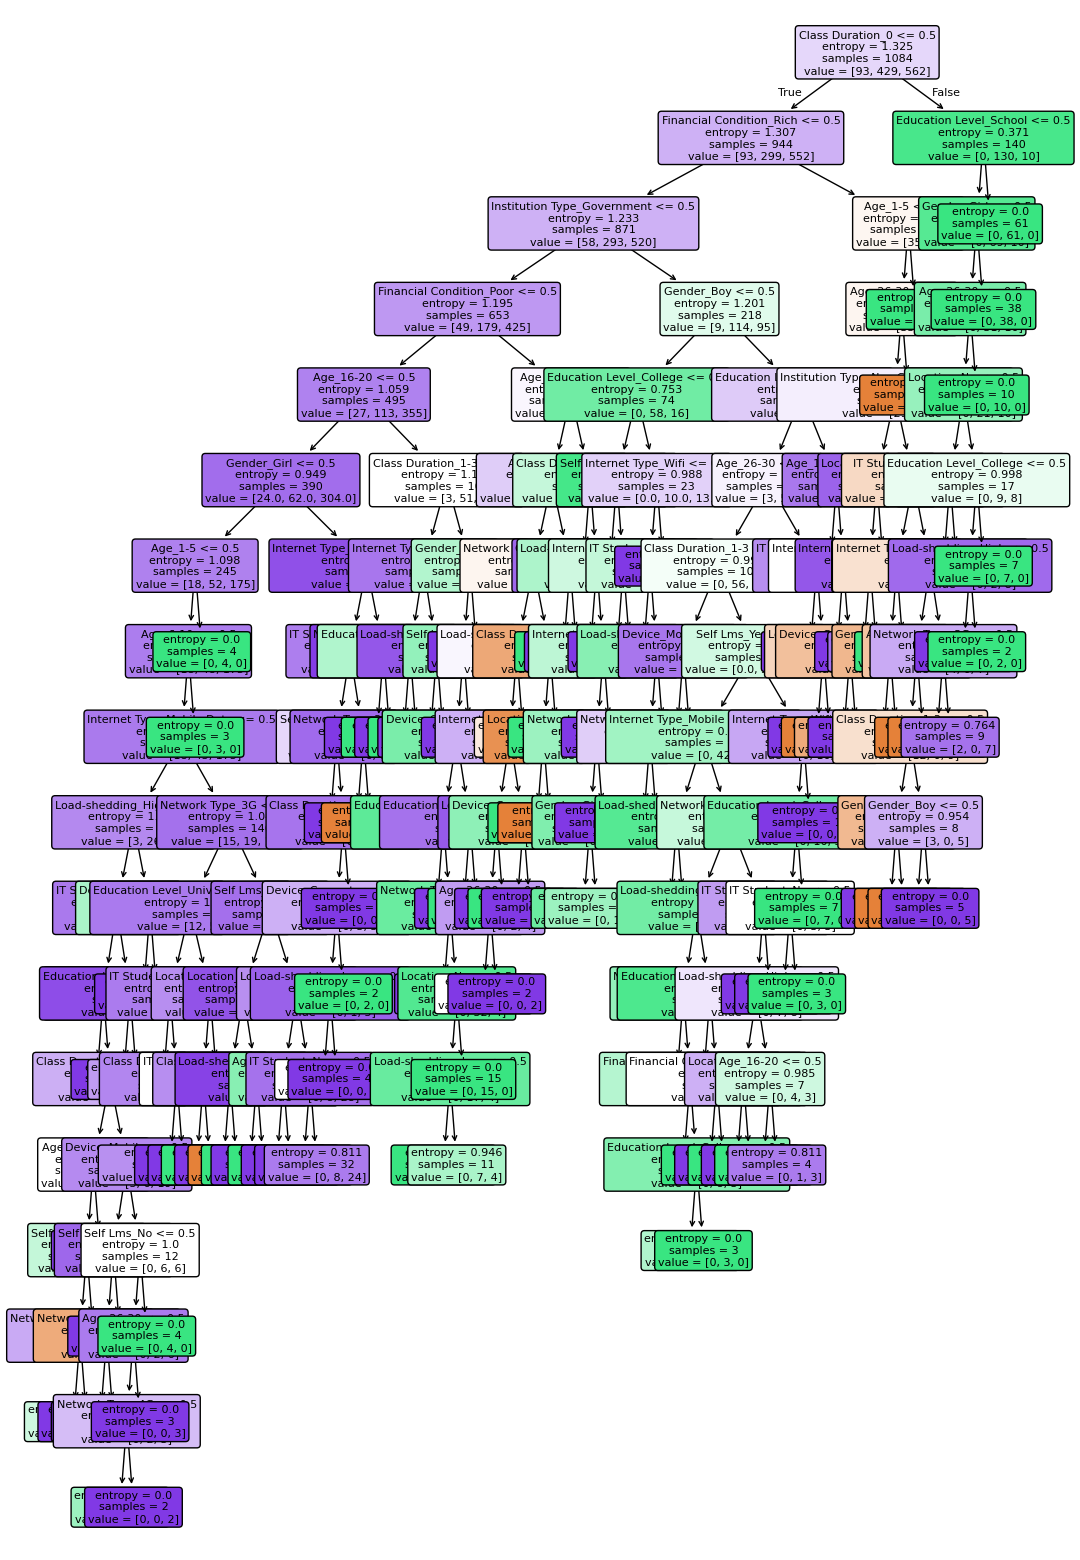

In [32]:
# Plot decision tree
plt.figure(figsize=(12, 20))
plot_tree(model2, feature_names=encoded_df.columns, filled=True, rounded=True, fontsize=8)
plt.show()

### Model3: Random Forest

In [33]:
# Determine the best parameters for the RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
# Define parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 5, 1),
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Random Search
random_search = RandomizedSearchCV(rf, param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)


Best parameters: {'n_estimators': 450, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [34]:
# Initiate the model
model3 = RandomForestClassifier(n_estimators= 450, min_samples_split= 2,
                                min_samples_leaf= 1, max_features= 'sqrt',
                                max_depth= 20)

# Train the model
model3.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=450)

In [35]:
# Predict features
predictions = model3.predict(X_test)

In [36]:
# Get model accuracy
model3_accuracy = accuracy_score(y_test, predictions)
model3_accuracy

0.9173553719008265

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
# Get confusion matrix
c_matrix = confusion_matrix(y_test, predictions)
c_matrix

array([[ 6,  0,  1],
       [ 0, 45,  6],
       [ 1,  2, 60]], dtype=int64)

In [39]:
# Get the classification report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.86      0.86      0.86         7\n           1       0.96      0.88      0.92        51\n           2       0.90      0.95      0.92        63\n\n    accuracy                           0.92       121\n   macro avg       0.90      0.90      0.90       121\nweighted avg       0.92      0.92      0.92       121\n'

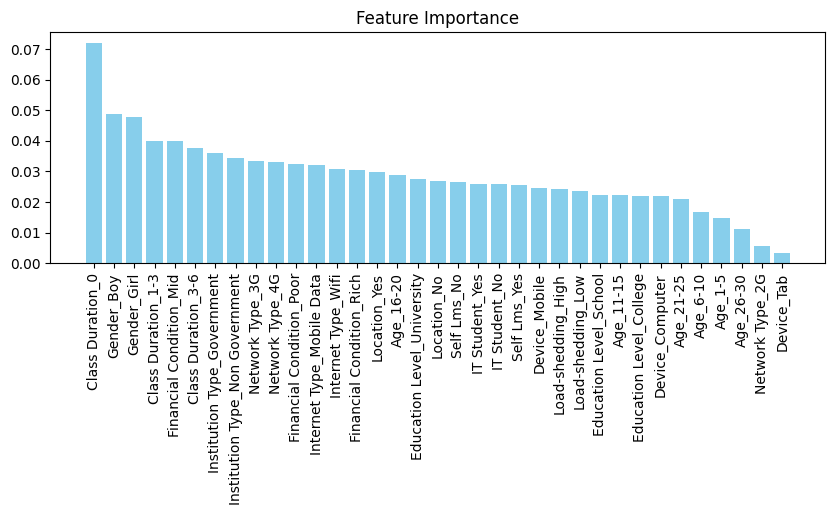

In [40]:
# # Plot feature importance

# Get feature importance
importance = model3.feature_importances_

indices = np.argsort(importance)[::-1]  # Sorts features
names = [encoded_df.columns[i] for i in indices]  # Get feature names in sorted order
plt.figure(figsize=(10, 3))
plt.title("Feature Importance")
plt.bar(range(len(importance)), importance[indices], color='skyblue')
plt.xticks(range(len(importance)), names, rotation=90)  # Adds feature names as x-axis labels
plt.show()


### Model 4: CatBoost

In [41]:
# # Get the best parameters for the CatBoost
# from skopt import BayesSearchCV

# bayes_search = BayesSearchCV(
#     CatBoostClassifier(loss_function='MultiClass', random_seed=42, verbose=0),
#     {
#         'depth': (4, 10),
#         'learning_rate': (0.01, 0.1, 'log-uniform'),
#         'iterations': (500, 1500)
#     },
#     n_iter=20, cv=3, scoring='accuracy', n_jobs=-1
# )

# bayes_search.fit(X_train, y_train)

# print("Best parameters:", bayes_search.best_params_)
# print("Best score:", bayes_search.best_score_)

In [42]:
# Train model
model4 = CatBoostClassifier(iterations=1108, depth=8, learning_rate=0.020156, loss_function='MultiClass')
model4.fit(X_train, y_train)

0:	learn: 1.0871232	total: 159ms	remaining: 2m 55s
1:	learn: 1.0766297	total: 184ms	remaining: 1m 41s
2:	learn: 1.0653467	total: 209ms	remaining: 1m 16s
3:	learn: 1.0543882	total: 233ms	remaining: 1m 4s
4:	learn: 1.0435585	total: 246ms	remaining: 54.2s
5:	learn: 1.0320541	total: 270ms	remaining: 49.6s
6:	learn: 1.0206523	total: 294ms	remaining: 46.3s
7:	learn: 1.0102640	total: 321ms	remaining: 44.2s
8:	learn: 1.0007298	total: 345ms	remaining: 42.2s
9:	learn: 0.9912806	total: 372ms	remaining: 40.8s
10:	learn: 0.9816467	total: 397ms	remaining: 39.6s
11:	learn: 0.9720025	total: 416ms	remaining: 38s
12:	learn: 0.9625786	total: 433ms	remaining: 36.5s
13:	learn: 0.9534636	total: 451ms	remaining: 35.3s
14:	learn: 0.9448602	total: 468ms	remaining: 34.1s
15:	learn: 0.9363730	total: 489ms	remaining: 33.4s
16:	learn: 0.9279624	total: 514ms	remaining: 33s
17:	learn: 0.9191320	total: 536ms	remaining: 32.5s
18:	learn: 0.9104833	total: 558ms	remaining: 32s
19:	learn: 0.9022044	total: 581ms	remaining:

In [43]:
# Predict new feature
predictions = model4.predict(X_test)

In [44]:
# Get the accuracy of the model
model4_accuracy = accuracy_score(y_test, predictions)
model4_accuracy

0.9256198347107438

### Model 5: Multiclass Classifier Neural Network

In [45]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop


In [46]:
N_CLASSES = 3
EPOCHS = 3

In [65]:
# Convert the training and testing dataframes to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [66]:
print(X_train_tensor.shape)

torch.Size([1084, 35])


In [68]:
# Show the new datatypes
print(X_train_tensor[:2].dtype)
print(y_test_tensor[:2].dtype)

torch.float32
torch.int64


In [69]:
# Set random seed
torch.manual_seed(0)
np.random.seed(0)

In [70]:
# Define a neural network using sequential
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(35, 60),
            torch.nn.ReLU(),
            torch.nn.Linear(60, 60),
            torch.nn.ReLU(),
            torch.nn.Linear(60, 30),
            torch.nn.ReLU(),
            torch.nn.Linear(30, 3),
            torch.nn.Softmax()
        )
        
    def forward(self, x):
        x = self.sequential(x)
        return x
    
# Initialize the Neural Network
network = SimpleNeuralNet()

# Define loss function, optimizer
criterion = nn.CrossEntropyLoss()
optimizer = RMSprop(network.parameters())

# Define data loader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Train the Neural Network
for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        
        data = data.float()  # Ensure input data is float
        target = target.long()  # Convert target to long
        
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print("Epoch:", epoch+1, "\tLoss:", loss.item())





Epoch: 1 	Loss: 1.022571325302124
Epoch: 2 	Loss: 0.820514976978302
Epoch: 3 	Loss: 0.8117759227752686


In [74]:
# Evaluate neural network
with torch.no_grad():
    output = network(X_test_tensor)
    test_loss = criterion(output, y_test_tensor)
    test_accuracy = (output.argmax(dim=1) == y_test_tensor).float().mean()
    print("Test Loss:", test_loss.item(), "\tTest Accuracy:",
        test_accuracy.item())

Test Loss: 0.8430094718933105 	Test Accuracy: 0.6942148804664612


### Create an Accuracy Table

In [ ]:
# Create accuracy table
accuracy = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'CatBoost'],
            'Accuracy_scores': [model1_accuracy, model2_accuracy, model3_accuracy, model4_accuracy]}


In [ ]:
accuracy_df = pd.DataFrame(accuracy)
accuracy_df

,Model,Accuracy_scores
0,Logistic Regression,0.694215
1,Decision Tree,0.925620
2,Random Forest,0.925620
3,CatBoost,0.925620


##### Predicting single features

In [ ]:
# Create a function that can predict one or multiple features
def predict_new_observation(new_observation):
    # Encode the new observation
    encoded_observation = one_hot_1.transform(new_observation)
    # Predict the new observation
    prediction = model4.predict(encoded_observation)[0]
    # Get the mapping
    mapping = dict(zip(one_hot_2.classes_, range(len(one_hot_2.classes_))))
    for key, value in mapping.items():
        if prediction == value:
            answer = key
    return answer

In [ ]:
# Predict the new observation
new_observation = df[100:101].drop(columns= 'Adaptivity Level', axis=1)
predict_new_observation(new_observation)

'Low'